In [1]:
import pandas as pd 
import numpy as np 
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from scipy import stats
from scipy.stats import kurtosis, skew 

# Import dataset

In [2]:
df_wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

# Define Function

In [3]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 
    return summary

In [4]:
def CalcOutliers(df_num): 
    data_mean, data_std = np.mean(df_num), np.std(df_num)
    cut = data_std * 3   
    lower, upper = data_mean - cut, data_mean + cut   

    outliers_lower = [x for x in df_num if x < lower] 
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]
    outliers_removed = [x for x in df_num if x > lower and x < upper]    
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) 
    print('Identified upper outliers: %d' % len(outliers_higher)) 
    print('Identified outliers: %d' % len(outliers_total)) 
    print('Non-outlier observations: %d' % len(outliers_removed))
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) 
    return

In [5]:
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# taking a look at the data

In [6]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [7]:
df_wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

# see the nan values

In [8]:
df_wine.isnull().sum()/len(df_wine)

country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [9]:
df_wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


# big overview of the data

In [10]:
def df_values(df_wine):
    for i in range(0, len(df_wine.columns)):
        print('----------', df_wine.columns[i], '---------')
        print (df_wine.iloc[:,i].value_counts())
        print ('----------', df_wine.columns[i], '---------- \n')
df_values(df_wine)    

---------- country ---------
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine    

In [11]:
df_wine['country'].value_counts(dropna=False)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
NaN                          63
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine 

# let's plot the missing data

<AxesSubplot:>

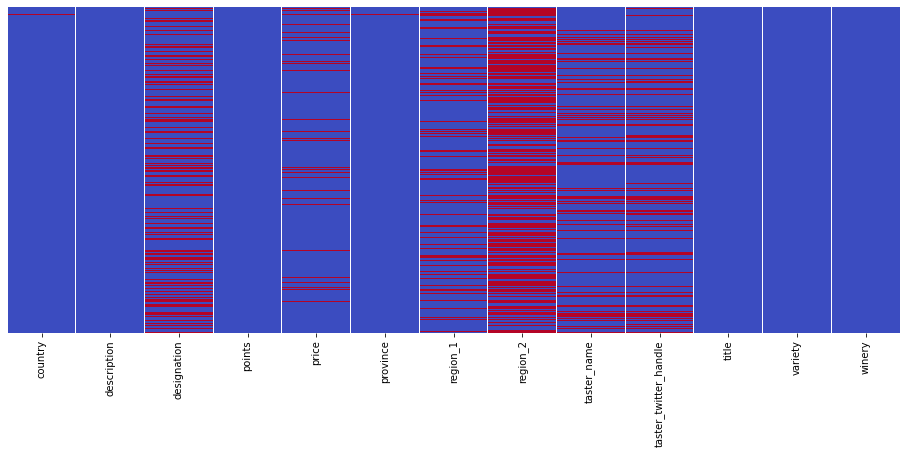

In [12]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_wine.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [13]:
df_wine[df_wine['designation'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,US,This Zinfandel from the eastern section of Nap...,NaN,90,22.0,California,Chiles Valley,Napa,Virginie Boone,@vboone,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini
129955,New Zealand,"Like Dog Point's 2011 Chardonnay, this wine is...",NaN,90,40.0,Marlborough,NaN,NaN,Joe Czerwinski,@JoeCz,Dog Point 2012 Chardonnay (Marlborough),Chardonnay,Dog Point
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation


In [14]:
df_wine[df_wine['region_2'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [15]:
df_wine['designation'].fillna('unknown',inplace=True)

In [16]:
df_wine['region_1'].fillna('unknown',inplace=True)

In [17]:
df_wine['province'].fillna('unknown',inplace=True)

In [18]:
df_wine.isnull().sum()/len(df_wine)

country                  0.000485
description              0.000000
designation              0.000000
points                   0.000000
price                    0.069215
province                 0.000000
region_1                 0.000000
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [19]:
df_wine = df_wine.dropna(subset=['price'])
df_wine = df_wine.reset_index(drop=True)

In [20]:
df_wine = df_wine.drop(['taster_name', 'taster_twitter_handle', 'region_2'], axis=1)

In [21]:
df_wine

,country,description,designation,points,price,province,region_1,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...
120970,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
120971,US,Citation is given as much as a decade of bottl...,unknown,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
120972,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
120973,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# dealing with nan values

In [22]:
#df_wine[df_wine['country'].isnull()]

In [23]:
df_wine['country'].fillna('unknown',inplace=True)

In [24]:
df_wine.isnull().sum()/len(df_wine)

country        0.000000
description    0.000000
designation    0.000000
points         0.000000
price          0.000000
province       0.000000
region_1       0.000000
title          0.000000
variety        0.000008
winery         0.000000
dtype: float64

In [25]:
df_wine.isnull().sum().sum()

1

In [26]:
df_wine['variety'].isnull().sum()

1

In [27]:
df_wine['variety'].fillna('', inplace=True)

In [28]:
df_wine.isnull().sum().sum()

0

# plot the data

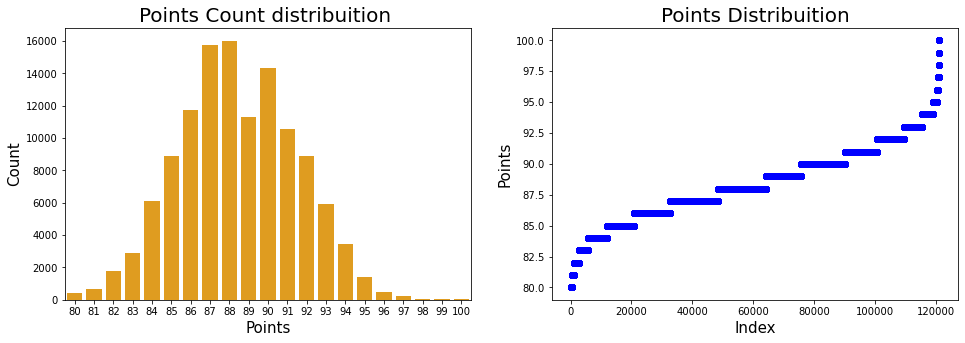

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
g = sns.countplot(x='points', data=df_wine, color='orange')     #looks very close to a normal distribution 
g.set_title("Points Count distribuition ", fontsize=20)
g.set_xlabel("Points", fontsize=15) 
g.set_ylabel("Count", fontsize=15) 

plt.subplot(1,2,2) 
plt.scatter(range(df_wine.shape[0]), np.sort(df_wine.points.values), color='blue')
plt.xlabel('Index', fontsize=15)  
plt.ylabel('Points', fontsize=15)  
plt.title("Points Distribuition", fontsize=20) 
plt.show() 

In [30]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

In [31]:
df_wine["rating_cat"] = df_wine["points"].apply(cat_points)

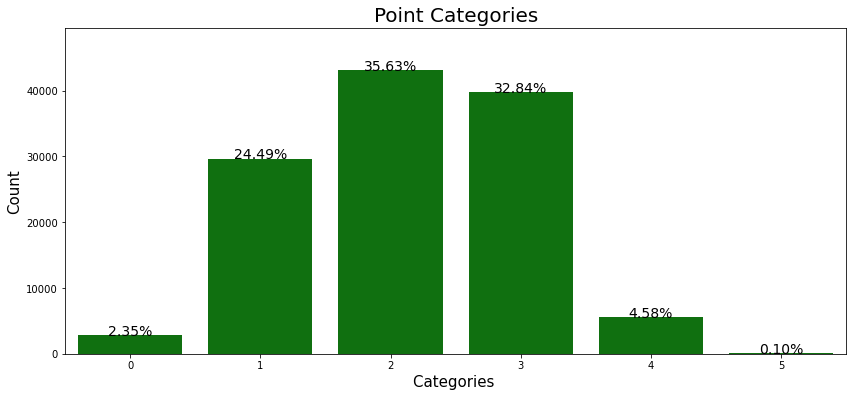

In [32]:
total = len(df_wine)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='green',data=df_wine)
g.set_title("Point Categories", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}%'.format((height/total)*100),ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15)
plt.show()

In [33]:
CalcOutliers(df_wine['points'])

Identified lowest outliers: 0
Identified upper outliers: 116
Identified outliers: 116
Non-outlier observations: 120859
Total percentual of Outliers:  0.096


C:\Users\eddie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


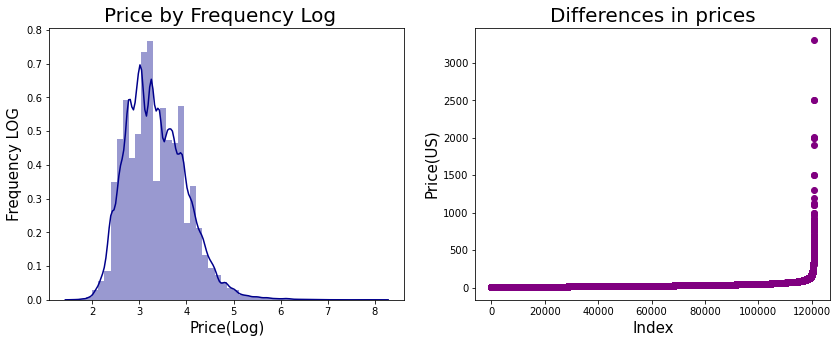

In [34]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df_wine['price'].dropna() + 1),color='darkblue')
g1.set_title("Price by Frequency Log  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df_wine.shape[0]), np.sort(df_wine.price.values), color='purple')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Price(US)', fontsize=15)
plt.title("Differences in prices", fontsize=20)
plt.show()

In [35]:
CalcOutliers(df_wine['price'])

Identified lowest outliers: 0
Identified upper outliers: 1177
Identified outliers: 1177
Non-outlier observations: 119798
Total percentual of Outliers:  0.9825


# looking at prices and points

In [36]:
df_wine['price_log'] = np.log(df_wine['price'])

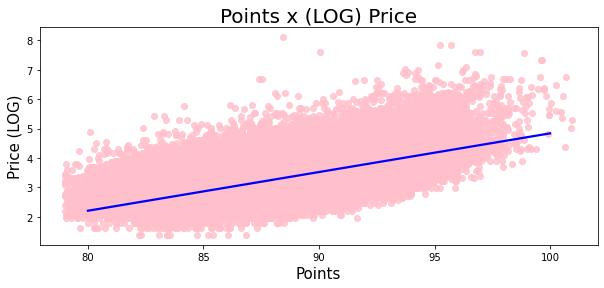

In [37]:
plt.figure(figsize=(10,4))
g = sns.regplot(x='points', y='price_log', data=df_wine, line_kws={'color':'blue'},x_jitter=True, fit_reg=True, color='pink')
g.set_title("Points x (LOG) Price", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (LOG)", fontsize= 15)
plt.show()

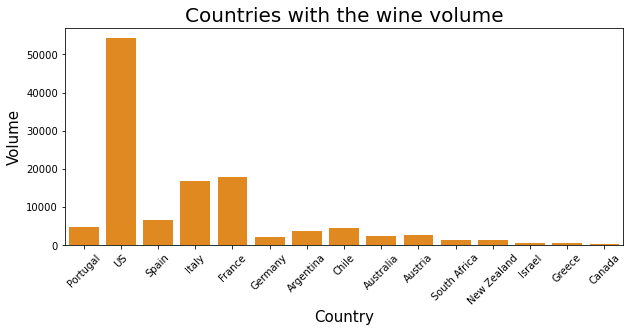

In [38]:
plt.figure(figsize=(10,4))
country = df_wine.country.value_counts()[:15]          #look at the top 20, 15 countries, looks like 15 is better
graph = sns.countplot(x='country', data=df_wine[df_wine.country.isin(country.index.values)],color='darkorange')
graph.set_title("Countries with the wine volume", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Volume", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
plt.show()

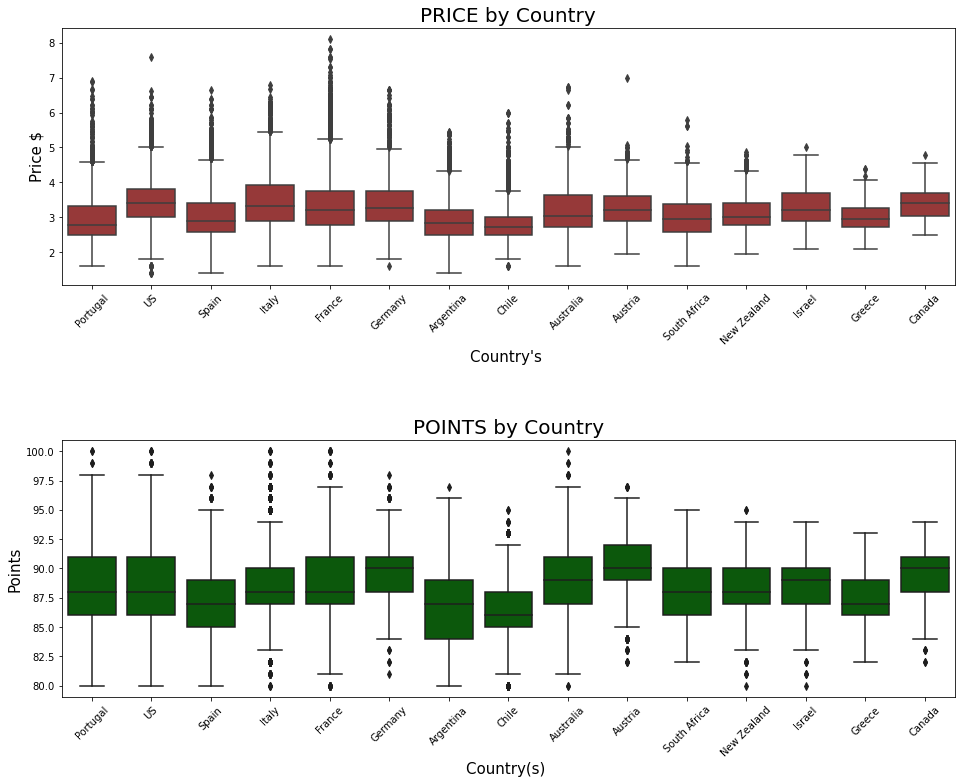

In [39]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df_wine.loc[(df_wine.country.isin(country.index.values))],
                 color='brown')
g.set_title("PRICE by Country", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price $", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df_wine[df_wine.country.isin(country.index.values)],
                 color='darkgreen')
g1.set_title("POINTS by Country", fontsize=20)
g1.set_xlabel("Country(s) ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.show()

# what about the smaller countries?

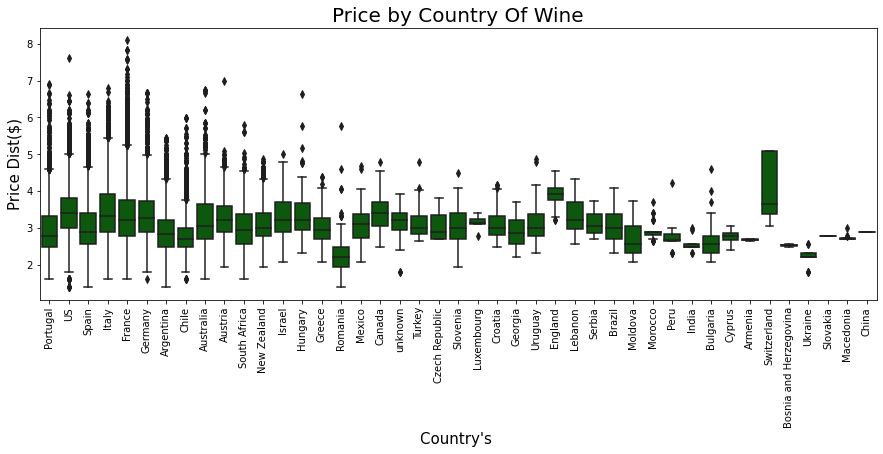

In [40]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price_log', color='darkgreen',data=df_wine)
g.set_title("Price by Country Of Wine", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist($)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

# let's look at ratings

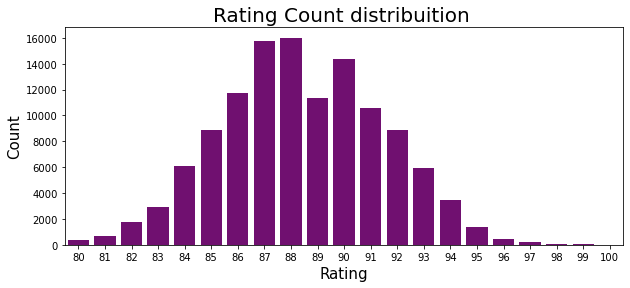

In [41]:
plt.figure(figsize=(10, 4))
graph = sns.countplot(x='points', data=df_wine, color='purple')
graph.set_title("Rating Count distribuition ", fontsize=20)
graph.set_xlabel("Rating", fontsize=15) 
graph.set_ylabel("Count", fontsize=15)
plt.show()

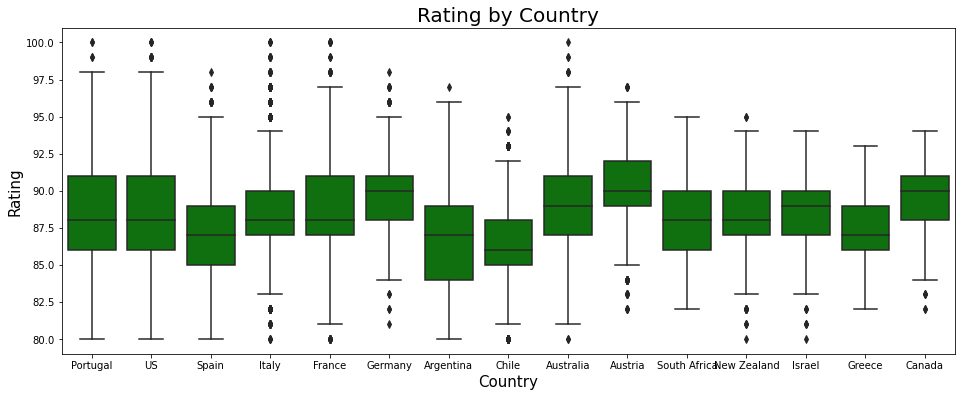

In [42]:
plt.figure(figsize=(16,6))
graph = sns.boxplot(x='country', y='points',data=df_wine[df_wine.country.isin(country.index.values)],color='green')
graph.set_title("Rating by Country", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Rating", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())
plt.show()

# let's look at the regions

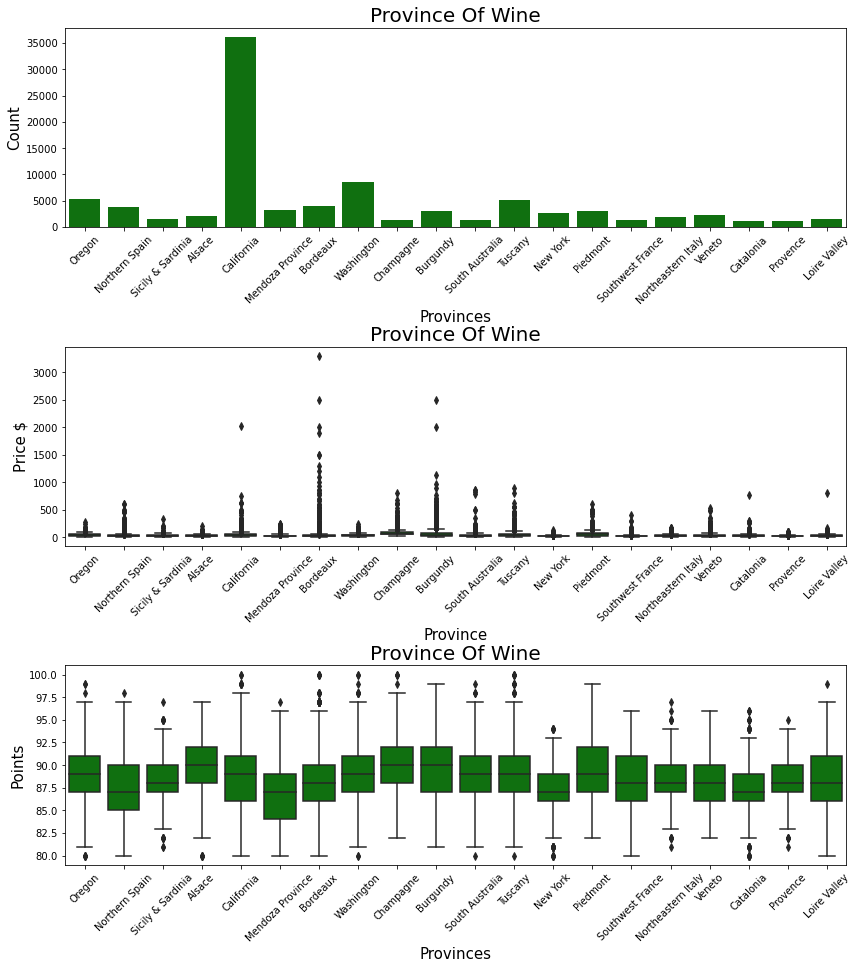

In [43]:
plt.figure(figsize=(14,15))
provinces = df_wine['province'].value_counts()[:20]
plt.subplot(3,1,1)
g = sns.countplot(x='province', 
                  data=df_wine.loc[(df_wine.province.isin(provinces.index.values))], 
                  color='green')
g.set_title("Province Of Wine", fontsize=20)
g.set_xlabel("Provinces", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='province',
                  data=df_wine.loc[(df_wine.province.isin(provinces.index.values))], 
                  color='green')
g1.set_title("Province Of Wine", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price $", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='province',
                  data=df_wine.loc[(df_wine.province.isin(provinces.index.values))], 
                  color='green')
g2.set_title("Province Of Wine", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.show()

# let's look at the wine type per province

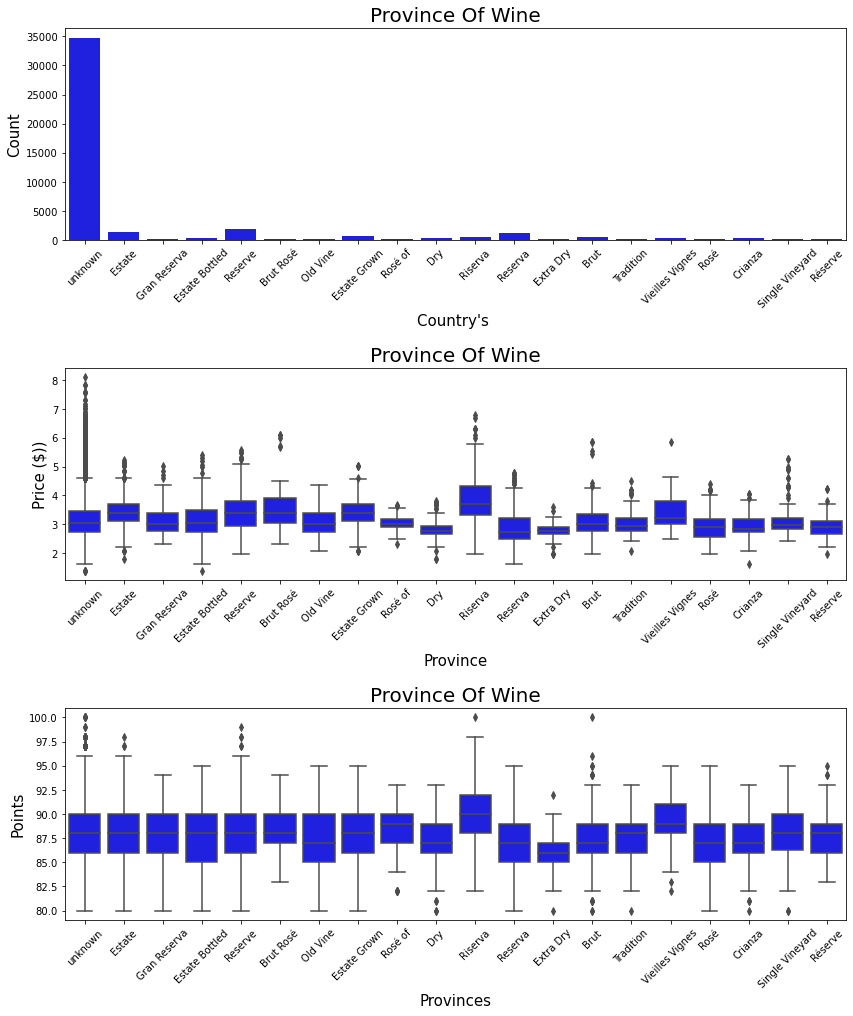

In [44]:
plt.figure(figsize=(14,16))

designation = df_wine.designation.value_counts()[:20]
plt.subplot(3,1,1)
g = sns.countplot(x='designation', 
                  data=df_wine.loc[(df_wine.designation.isin(designation.index.values))],
                  color='blue')
g.set_title("Province Of Wine", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='designation',
                  data=df_wine.loc[(df_wine.designation.isin(designation.index.values))], 
                 color='blue')
g1.set_title("Province Of Wine", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price ($))", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='designation',
                  data=df_wine.loc[(df_wine.designation.isin(designation.index.values))], 
                 color='blue')
g2.set_title("Province Of Wine", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.show()

# what are the top varieties

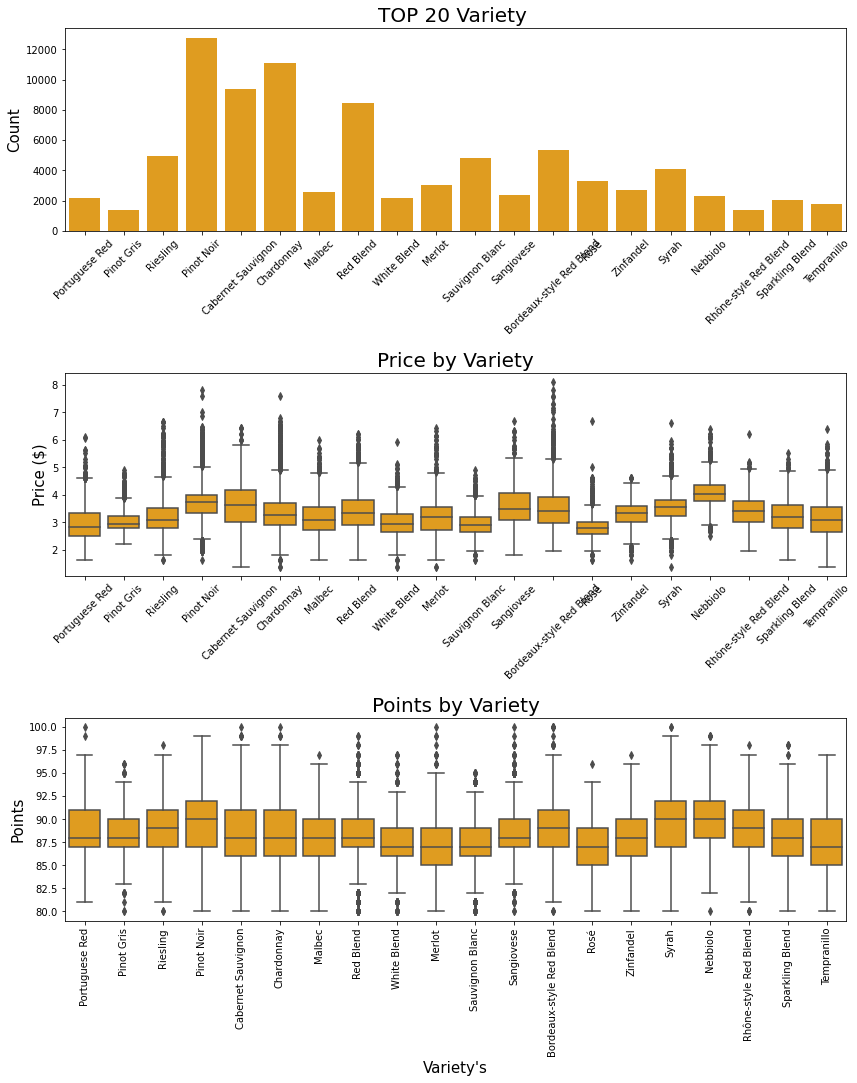

In [45]:
plt.figure(figsize=(14,16))

variety = df_wine.variety.value_counts()[:20]
plt.subplot(3,1,1)
g = sns.countplot(x='variety', 
                  data=df_wine.loc[(df_wine.variety.isin(variety.index.values))], 
                  color='orange')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='variety',
                  data=df_wine.loc[(df_wine.variety.isin(variety.index.values))], 
                 color='orange')
g1.set_title("Price by Variety", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price ($)", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=df_wine.loc[(df_wine.variety.isin(variety.index.values))], 
                 color='orange')
g2.set_title("Points by Variety", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
plt.subplots_adjust(hspace = 0.7,top = 0.9)
plt.show()

# description length

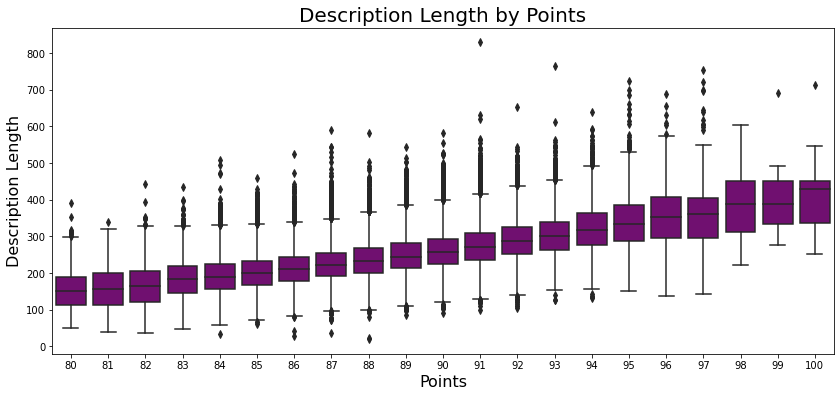

In [46]:
df_wine = df_wine.assign(desc_length = df_wine['description'].apply(len))  #length

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=df_wine,color='purple')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) 
g.set_xlabel('Points', fontsize = 16) 
plt.show()

# is there a relationship betweeen the wine description length and price?

<ipython-input-47-65ed6db8a65f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=45)


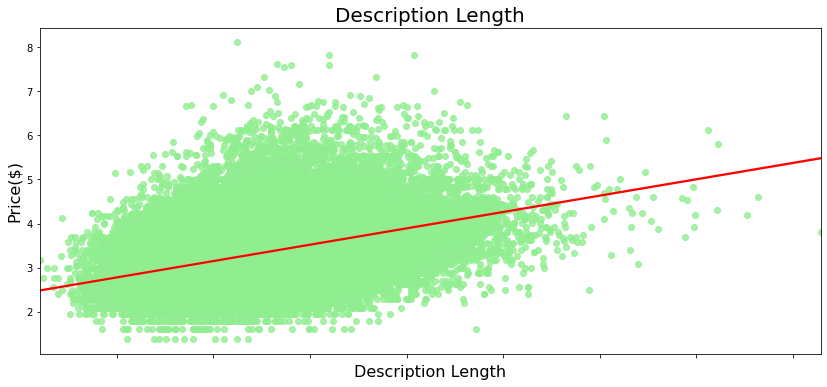

In [47]:
plt.figure(figsize=(14,6))
g = sns.regplot(x='desc_length', y='price_log', line_kws={'color':'red'},data=df_wine, fit_reg=True, color='lightgreen', )
g.set_title('Description Length', fontsize=20)
g.set_ylabel('Price($)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

# let's make a word cloud with the wine descriptions

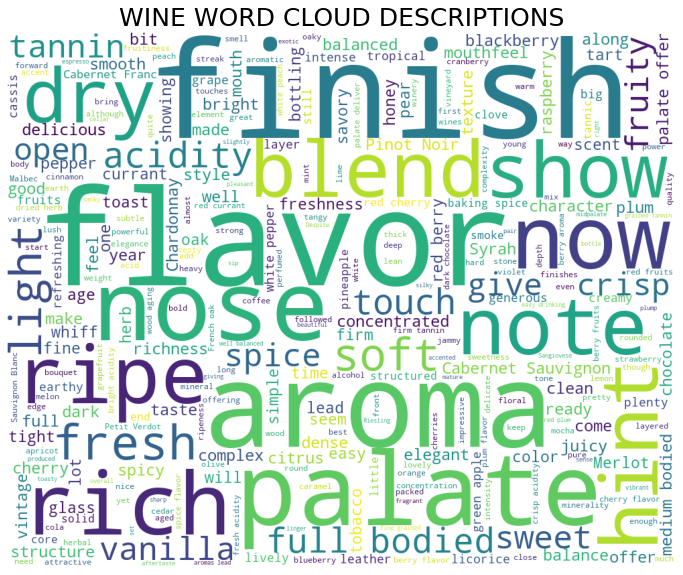

In [48]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=200, width=1000, height=800,random_state=1942,
).generate(" ".join(df_wine['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WINE WORD CLOUD DESCRIPTIONS",fontsize=25)
plt.axis('off')
plt.show()

# let's make a word cloud with the wine titles

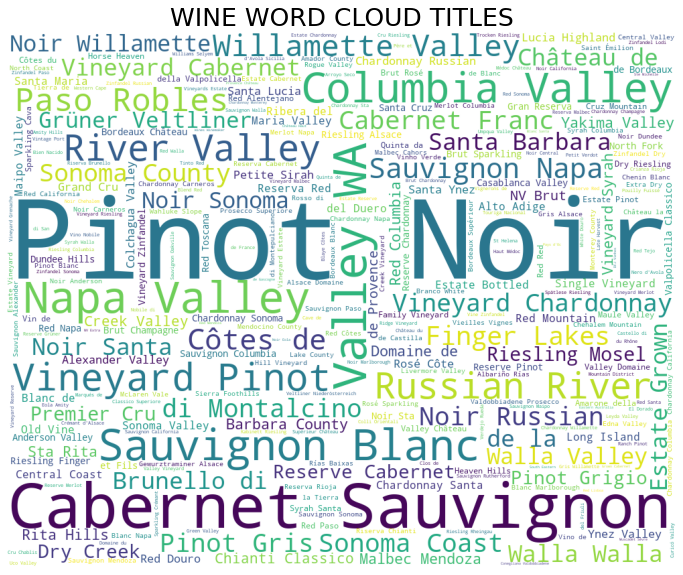

In [49]:
wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=200, width=1000, height=800,random_state=1930,
).generate(" ".join(df_wine['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WINE WORD CLOUD TITLES",fontsize=25)
plt.axis('off')
plt.show()

# Tift Vectorizer

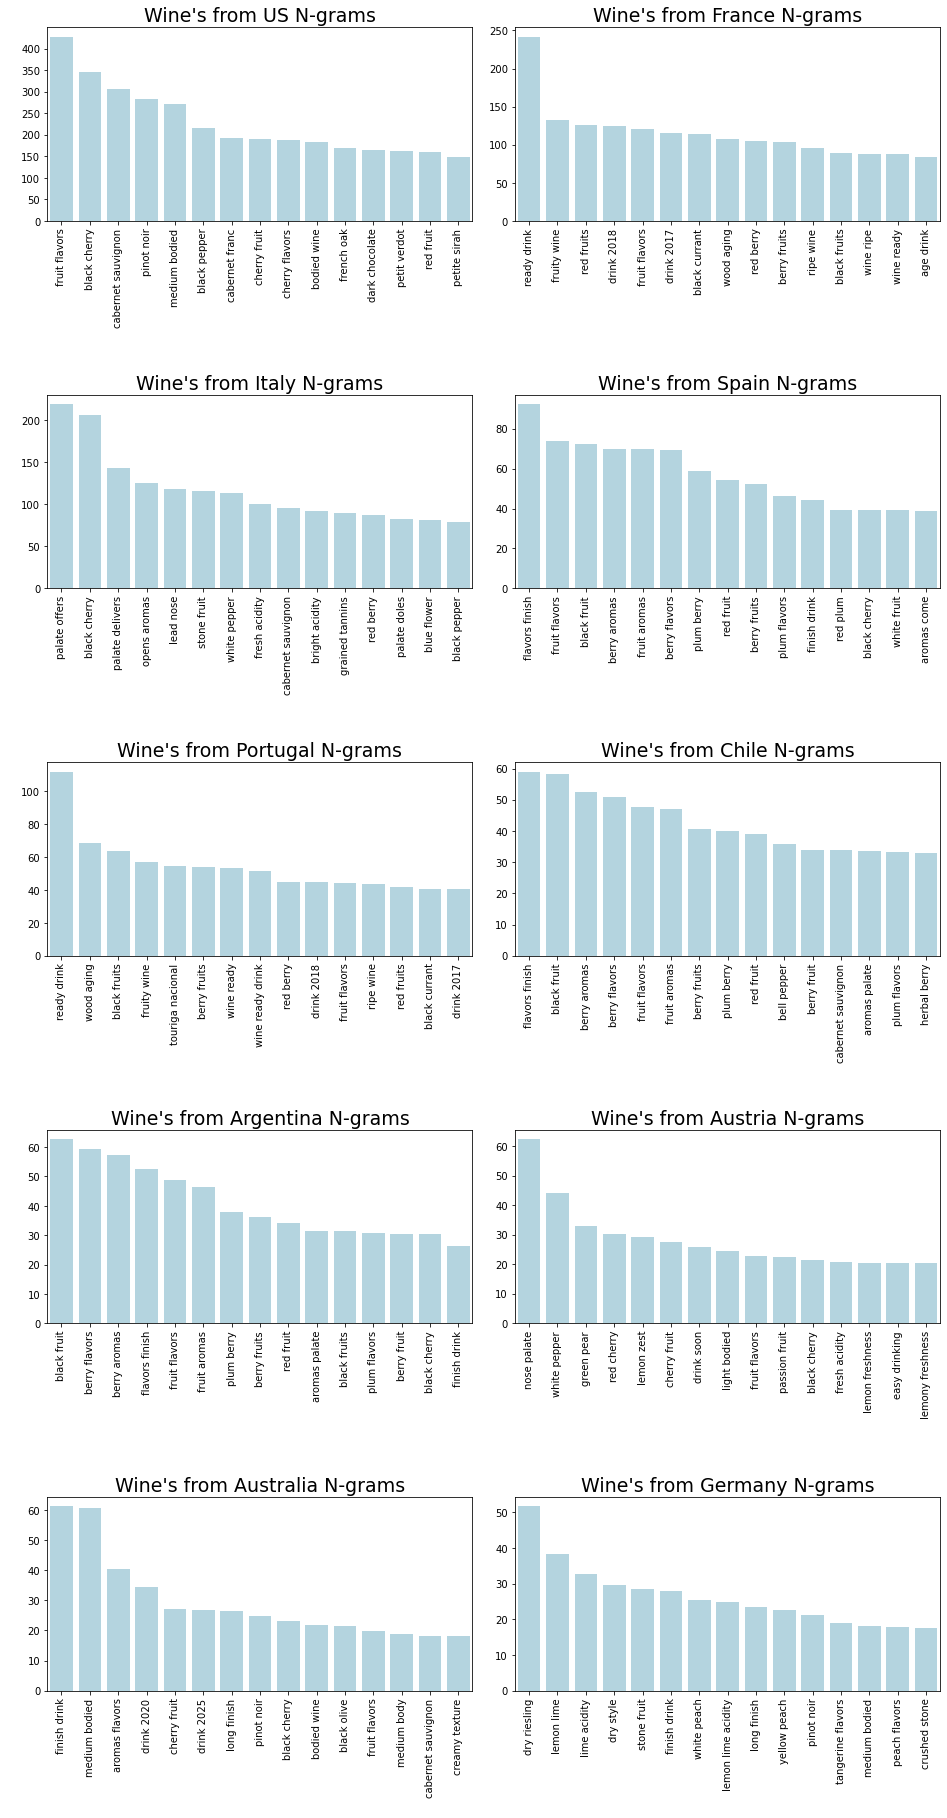

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.gridspec as gridspec 

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,7*4))

for n, cat in enumerate(country.index[:10]):
    
    ax = plt.subplot(grid[n])   
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), min_df=5, stop_words='english',max_df=.5) 
    
    X2 = vectorizer.fit_transform(df_wine.loc[(df_wine.country == cat)]['description']) 
    features = (vectorizer.get_feature_names()) 
    scores = (X2.toarray()) 
    
    # Getting top ranking features 
    sums = X2.sum(axis = 0) 
    dt1 = [] 
    
    for col, term in enumerate(features): 
        dt1.append( (term, sums[0,col] )) 

    ranking = pd.DataFrame(dt1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False))[:15]
    
    sns.barplot(x='term', y='rank', data=words, ax=ax, color='lightblue', orient='v')
    ax.set_title(f"Wine's from {cat} N-grams", fontsize=19)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(" ")

plt.subplots_adjust(top = 0.95, hspace=.9, wspace=.1)
plt.show()

# sentiment analysis

In [51]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

sentiment = df_wine.sample(15000).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'

# let's make a plot of the sentiment results

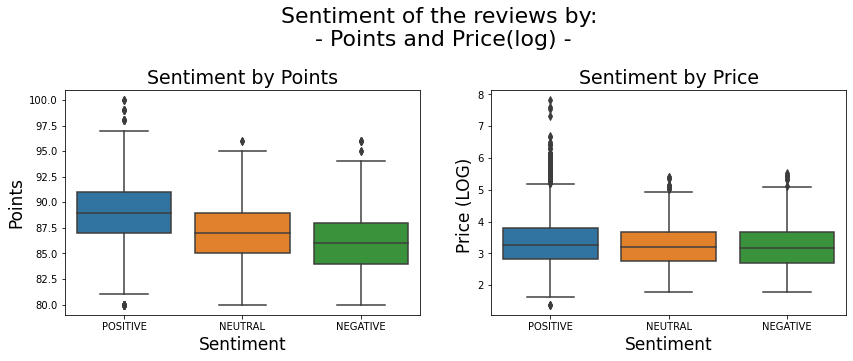

In [52]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment)
ax.set_title("Sentiment by Points", fontsize=19)
ax.set_ylabel("Points", fontsize=17)
ax.set_xlabel("Sentiment", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price_log', data=sentiment)
ax1.set_title("Sentiment by Price", fontsize=19)
ax1.set_ylabel("Price (LOG) ", fontsize=17)
ax1.set_xlabel("Sentiment", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()

# KNN nearest neighbors clustering

# first transform the data

In [53]:
from scipy.sparse import csr_matrix
col = ['points','variety','province']   #let's look at points, variety and province
wine = df_wine[col]
wine = wine.dropna(axis=0)
wine = wine.drop_duplicates(['province','variety'])
wine = wine[wine['points'] > 90]

wine_pivot = wine.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [54]:
from sklearn.neighbors import NearestNeighbors 

knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

# the recommender model

In [55]:
for n in range(5):
    query_index = np.random.choice(wine_pivot.shape[0])
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=5)  #tried with 5 neighbors
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recmmendation for -{0}:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')

Recmmendation for -Chardonnay-Semillon:
1: Cabernet Sauvignon-Merlot-Shiraz with distance: 0.0
2: Chardonnay-Semillon with distance: 0.0
3: Montepulciano with distance: 0.0
4: Shiraz-Viognier with distance: 0.2706973060203227


Recmmendation for -Cabernet Sauvignon-Malbec:
1: Cabernet Franc-Malbec with distance: 0.4143728423040115
2: Malbec-Cabernet with distance: 0.4143728423040115
3: Malbec-Petit Verdot with distance: 0.4143728423040115
4: Merlot-Cabernet with distance: 0.42683299459541557


Recmmendation for -White Port:
1: Muscat Blanc with distance: 0.0
2: Malvasia Bianca with distance: 0.0
3: Moscato Giallo with distance: 0.0
4: Lagrein with distance: 0.0


Recmmendation for -Babosa Negro:
1: Petit Verdot with distance: 0.6848152877312688
2: Roussanne-Marsanne with distance: 1.0
3: Roussanne with distance: 1.0
4: Roviello with distance: 1.0


Recmmendation for -Vidal:
1: Vidal Blanc with distance: 0.2890398620831277
2: Gewürztraminer with distance: 0.29676768966918066
3: Moscato 

# more modeling

# let's encode the categoricals

In [56]:
df_wine_enc = df_wine.copy().drop(columns = ['title']) 

In [57]:
df_wine_cat = [col for col in df_wine_enc.columns if df_wine_enc[col].dtype == "object"] #select all object types

In [58]:
df_wine_cat

['country',
 'description',
 'designation',
 'province',
 'region_1',
 'variety',
 'winery']

In [59]:
df_wine_enc

,country,description,designation,points,price,province,region_1,variety,winery,rating_cat,price_log,desc_length
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,unknown,Portuguese Red,Quinta dos Avidagos,2,2.708050,227
1,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm,2,2.639057,186
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian,2,2.564949,199
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks,2,4.174387,249
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tempranillo-Merlot,Tandem,2,2.708050,261
...,...,...,...,...,...,...,...,...,...,...,...,...
120970,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,unknown,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),3,3.332205,227
120971,US,Citation is given as much as a decade of bottl...,unknown,90,75.0,Oregon,Oregon,Pinot Noir,Citation,3,4.317488,233
120972,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Gewürztraminer,Domaine Gresser,3,3.401197,225
120973,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.0,Alsace,Alsace,Pinot Gris,Domaine Marcel Deiss,3,3.465736,216


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df_wine_cat:
    df_wine_enc[col] = label_encoder.fit_transform(df_wine_enc[col])

In [76]:
df_wine_enc.columns

Index(['country', 'description', 'designation', 'points', 'province',
       'region_1', 'variety', 'winery', 'rating_cat', 'price_log',
       'desc_length', 'price'],
      dtype='object')

In [62]:
y = df_wine_enc['price']
X = df_wine_enc.drop(['price'], axis = 1)

# train test split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(96780, 11)
(24195, 11)
(96780,)
(24195,)


In [64]:
X_train

,country,description,designation,points,province,region_1,variety,winery,rating_cat,price_log,desc_length
68937,39,37898,28641,87,253,431,475,7171,2,2.564949,259
115283,39,44918,3392,91,51,180,472,14509,3,3.401197,304
104803,21,104417,11776,84,381,829,457,4601,1,2.772589,231
9019,39,53759,20060,90,266,395,436,15599,3,3.871201,292
63183,39,83178,619,88,395,1175,61,14279,2,4.317488,376
...,...,...,...,...,...,...,...,...,...,...,...
110268,0,43150,35714,88,214,622,277,179,2,2.302585,192
119879,39,12113,35714,91,51,932,206,13687,3,3.218876,358
103694,39,21353,17160,88,51,953,8,2158,2,3.218876,273
860,42,12687,2019,87,418,1204,140,7479,2,3.401197,296


# Linear model

In [65]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

-142.03721566848972
[-2.31137743e-01  1.24012885e-06  1.03554181e-04  3.35475778e-01
 -2.25009013e-03  9.11287470e-04 -3.03684868e-04 -8.17539090e-05
 -3.54779029e+00  4.84667984e+01 -4.16940782e-03]


In [66]:
y_pred = regressor.predict(X_test)
filtered_data_pred = pd.DataFrame({'actual':y_test, 'predicted':y_pred})  #depends on X_test TEST SIZE
print(filtered_data_pred)

        actual  predicted
28204     26.0  31.628160
8289      40.0  48.898018
115123    30.0  32.538809
57139     24.0  25.852237
64187     16.0   9.579429
...        ...        ...
116384    26.0  36.616779
50751     12.0  -5.498471
56946     24.0  25.105330
111770    10.0  -3.228463
44517    100.0  87.818551

[24195 rows x 2 columns]


# summary

In [67]:
from sklearn.metrics import r2_score
predictions = regressor.predict(X_train)
print('R2 score train:', r2_score(y_train, predictions))

R2 score train: 0.533767269768963


In [68]:
predictions = regressor.predict(X_test)
print('R2 score train:', r2_score(y_test, predictions))

R2 score train: 0.5783767694674522


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MSE = mean_squared_error(y_test,y_pred)
print('MSE:',round(MSE,1))
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))  #mean is 69
print('RMSE:',round(RMSE,1))
MAE = mean_absolute_error(y_test, y_pred)
print('MAE:',round(MAE,1))
mse_mean=np.mean(MSE)
#print('Mean Squared Error: ',mse_mean)
diff=MSE-abs(mse_mean)
print('DIFF',diff) 

MSE: 699.6
RMSE: 26.5
MAE: 10.7
DIFF 0.0


In [70]:
correlation = df_wine_enc.corr()
correlation['price'].sort_values(ascending = False)

price          1.000000
price_log      0.731005
points         0.416167
rating_cat     0.384950
desc_length    0.251699
country        0.014336
description    0.011999
winery        -0.008831
province      -0.047076
region_1      -0.053777
designation   -0.065989
variety       -0.071815
Name: price, dtype: float64

# more detailed summary 

In [71]:
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(y, X).fit()
mse_mean=np.mean(MSE)
print('Mean Squared Error: ',mse_mean)
diff=MSE-abs(mse_mean)
print('DIFF',diff)
print(model.summary())    

Mean Squared Error:  699.6142287520474
DIFF 0.0
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                          3.077e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        20:06:34   Log-Likelihood:                     -5.7386e+05
No. Observations:              120975   AIC:                                  1.148e+06
Df Residuals:                  120964   BIC:                                  1.148e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025     

# plot

Text(0, 0.5, 'Test Values')

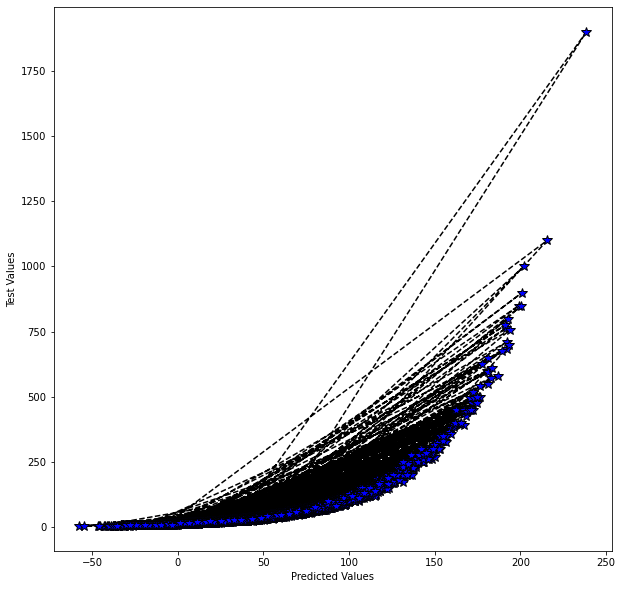

In [72]:
plt.figure(figsize=(10,10))
plt.plot(y_pred, y_test, color='black', linestyle='--', marker='*', markerfacecolor='blue', markersize=10) # https://zhuanlan.zhihu.com/p/81787851
plt.xlabel('Predicted Values')
plt.ylabel('Test Values')

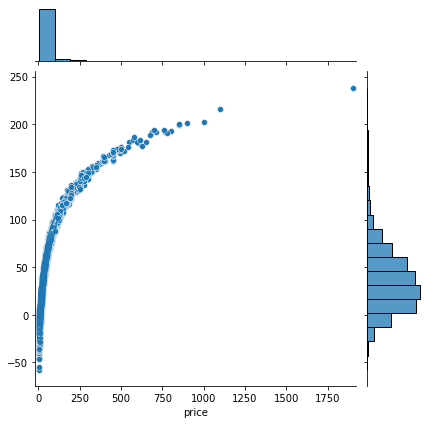

<Figure size 432x288 with 0 Axes>

In [73]:
g = (sns.jointplot(x = y_test, y = y_pred, kind = 'scatter', data = 'reg', marginal_kws = {"bins": 20}).plot_joint(sns.kdeplot))
plt.show()
plt.clf()

# Comparing Decision Tree Regressor, Linear Regression, and KNN model scores with the same Target

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
model = DecisionTreeRegressor()

# need to randomize X and y, but together
df_wine_enc = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df_wine_enc.columns = ['country', 'description', 'designation', 'points', 'province',
       'region_1', 'variety', 'winery', 'rating_cat', 'price_log',
       'desc_length', 'price']
df_wine_enc = df_wine_enc.sample(frac=1)
df_wine_enc.head()
X_rand=np.array(df_wine_enc.loc[:, df_wine_enc.columns != 'price'])
y_rand=np.array(df_wine_enc['price'])

scores = cross_val_score(model, X_rand, y_rand, cv=10)
scores

array([0.99751685, 0.99990527, 0.99897092, 0.98899119, 0.98071347,
       0.99981033, 0.99998257, 0.99775863, 0.99997413, 0.9993762 ])

In [79]:
model1 = DecisionTreeRegressor()
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()

import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': 0.9927418372597476, 'Linear Regression': 0.5941065481482087, 'KNN': -0.15094002487011343}


In [80]:
val_scores = {}

for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train, y_train)
    val_scores[model_name] = model.score(X_val,y_val)
print(val_scores)

{'Decision Tree Regressor': 0.9884503925986359, 'Linear Regression': 0.4839424227871235, 'KNN': -0.07153124601564254}


# Random Forest

In [81]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=333)
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.914 (0.031)


# save to CSV

In [82]:
df_wine.to_csv('df_wine.csv', sep =';' ,index=False)